In [1]:
!date

Fri May  8 14:08:38 PDT 2020


In [1]:
!git clone https://github.com/pachterlab/BLCSBGLKP_2020.git

Cloning into 'BLCSBGLKP_2020'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 114 (delta 19), reused 61 (delta 6), pack-reused 0
Receiving objects: 100% (114/114), 23.60 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
!pip install anndata

# SwabSeq Experimental Design

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import anndata
from collections import defaultdict
import matplotlib.patches as mpatches

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

/home/sina/bin/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
adata = anndata.read_h5ad("BLCSBGLKP_2020/data/kb/adata.h5ad")

# Total amplicon counts per well

In [4]:
let = list(string.ascii_uppercase[:string.ascii_uppercase.index("Q")])
num = np.arange(24)

plate = np.zeros((len(let), len(num)))

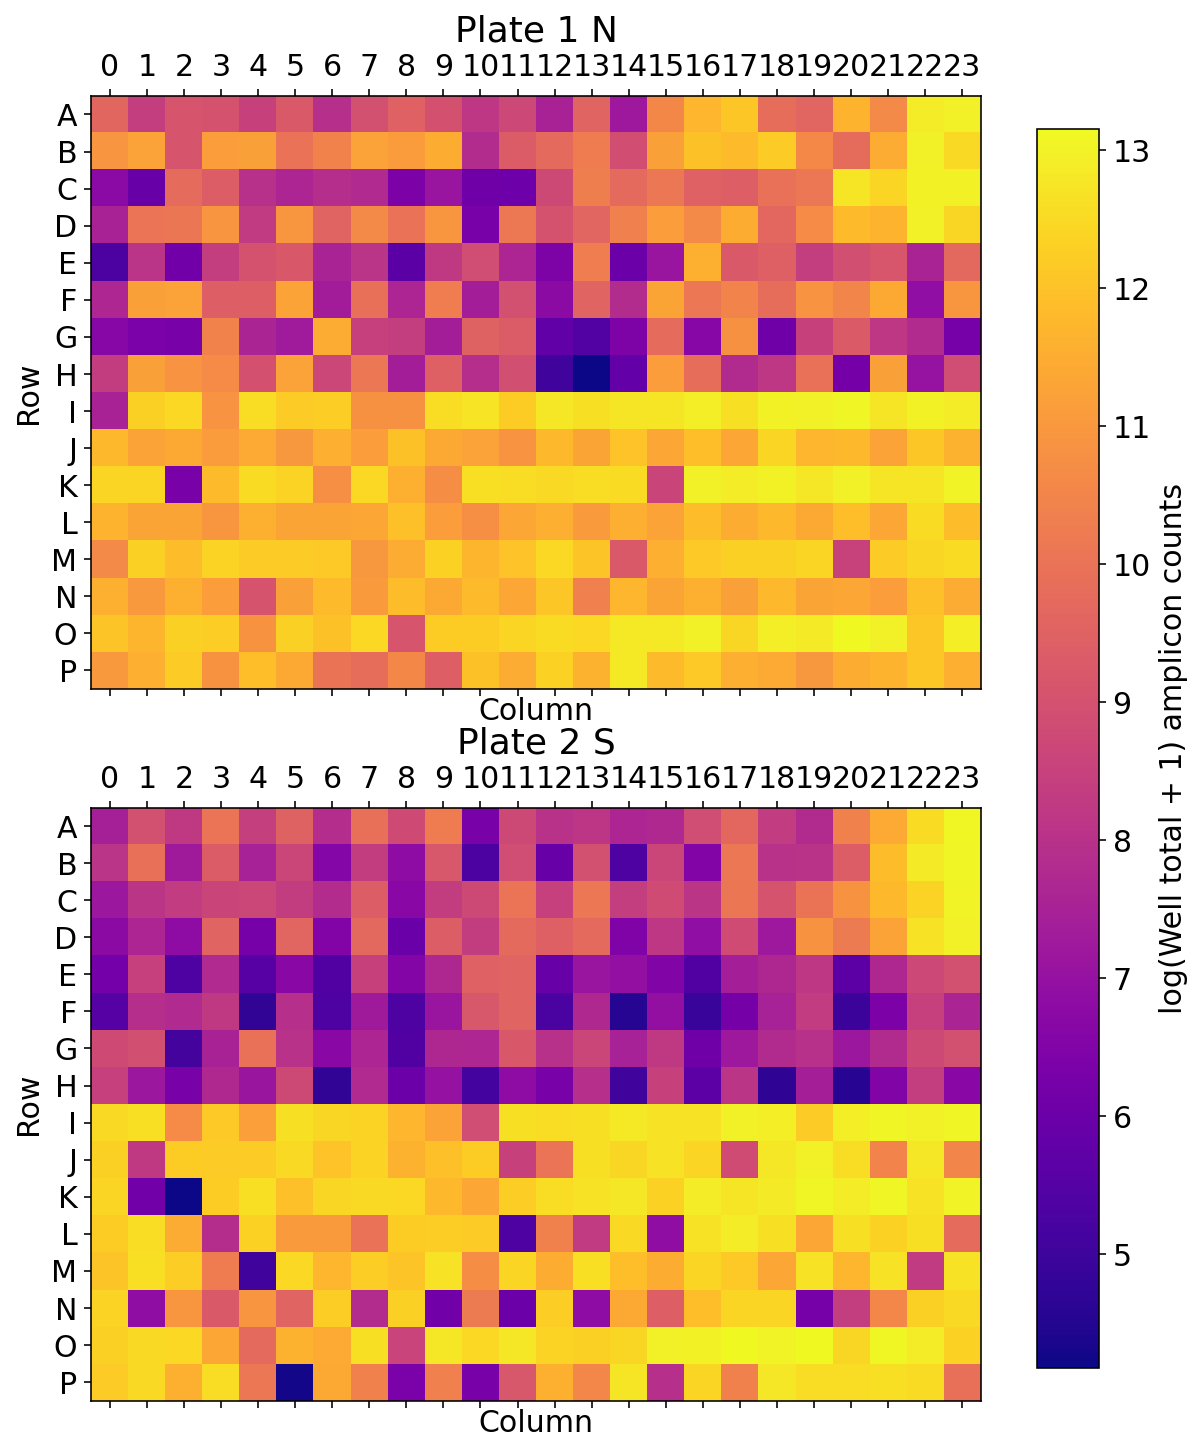

In [5]:
fig, axs = plt.subplots(figsize=(10,12), nrows=2)


# Plate 1
ax = axs[0]
mtx = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].layers["raw"].sum(axis=1)).reshape(16, 24)
cax = ax.matshow(np.log1p(mtx), origin="upper", cmap="plasma")
#cbar = fig.colorbar(cax, label="Log10(Well Total)")

ax.set_xticks(np.arange(len(num)))
ax.set_xticklabels(num)
ax.set_yticks(np.arange(len(let)))
ax.set_yticklabels(let)

ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("Plate 1 N", pad=12.5)



# Plate 2
ax = axs[1]
mtx = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].layers["raw"].sum(axis=1)).reshape(16, 24)
cax = ax.matshow(np.log1p(mtx), origin="upper", cmap="plasma")
#cbar = fig.colorbar(cax, label="Log10(Well Total)")

ax.set_xticks(np.arange(len(num)))
ax.set_xticklabels(num)
ax.set_yticks(np.arange(len(let)))
ax.set_yticklabels(let)

ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("Plate 2 S", pad=12.5)


cbar = fig.colorbar(cax, ax=axs.ravel().tolist(), shrink=0.95, label="log(Well total + 1) amplicon counts")
#plt.savefig("./figs/total_counts.png",bbox_inches='tight', dpi=300)

plt.show()

# Condition

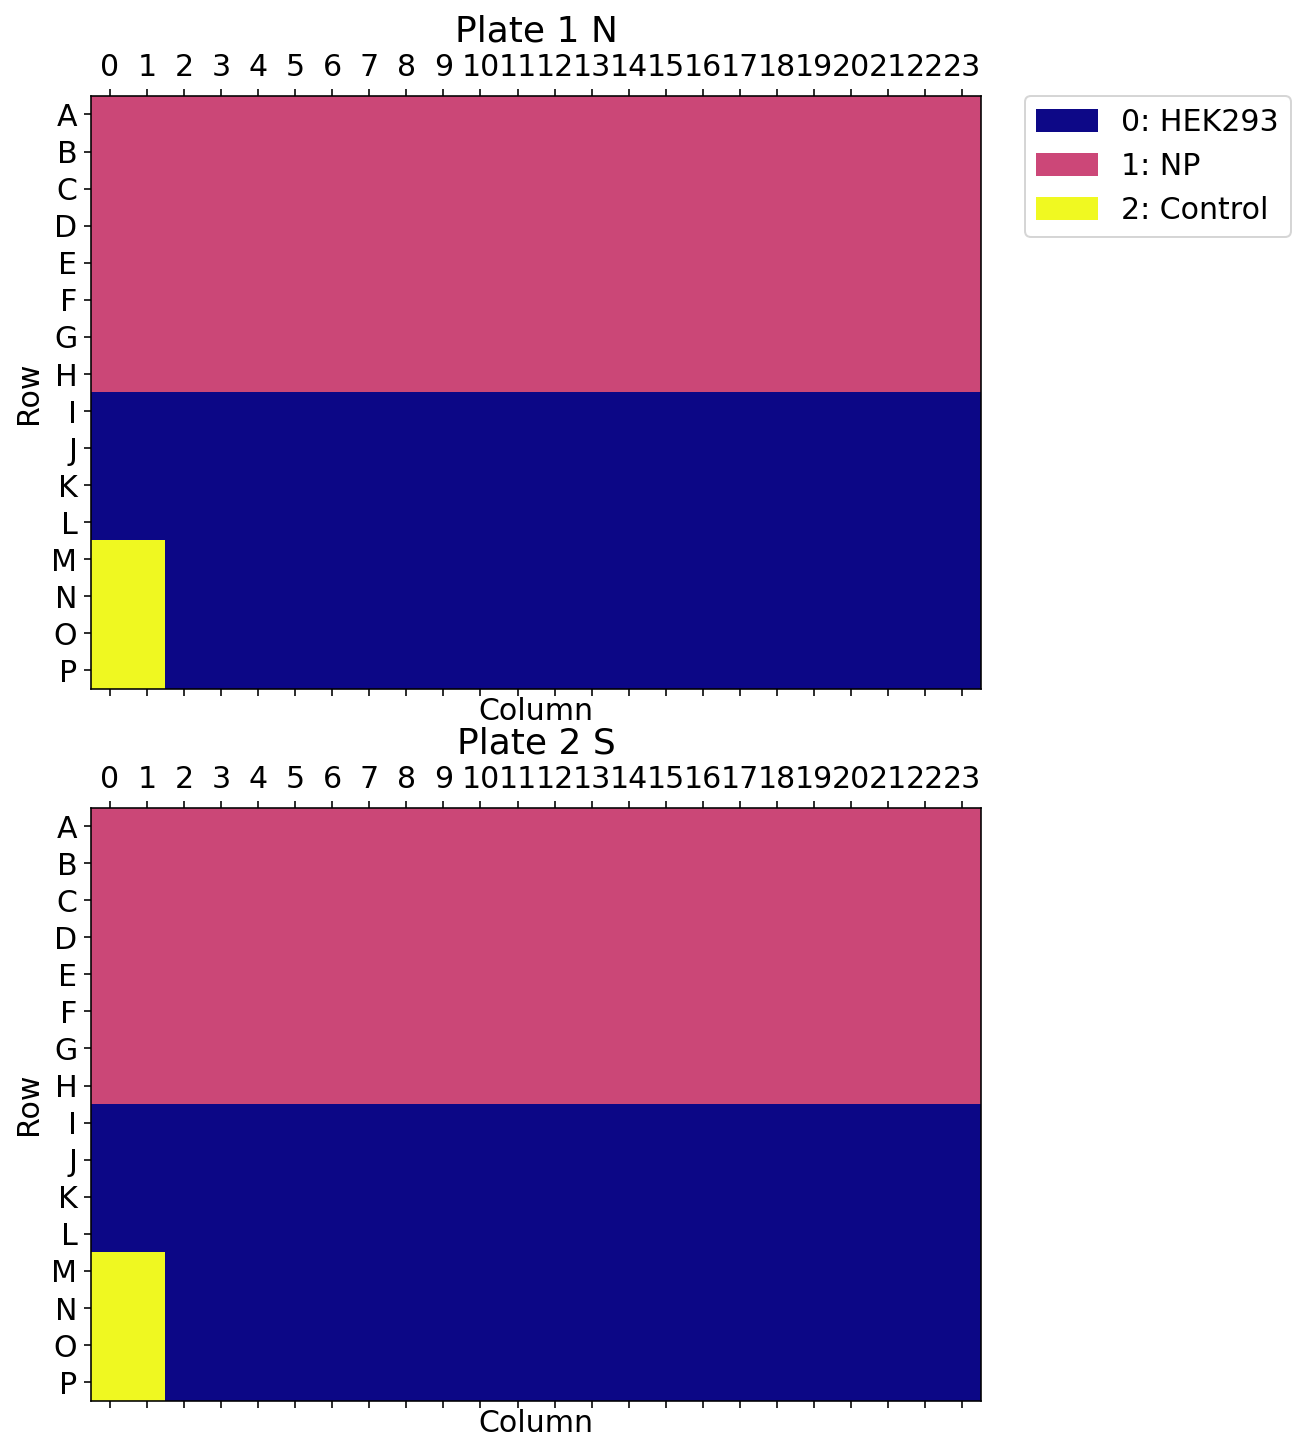

In [6]:
fig, axs = plt.subplots(figsize=(10,12), nrows=2)

# Plate 1
ax = axs[0]
mtx = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].obs["lysate"].astype("category").cat.codes).reshape(16, 24)
cax = ax.matshow(mtx, origin="upper", cmap="plasma")
#cbar = fig.colorbar(cax, label="Log10(Well Total)")

ax.set_xticks(np.arange(len(num)))
ax.set_xticklabels(num)
ax.set_yticks(np.arange(len(let)))
ax.set_yticklabels(let)

ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("Plate 1 N", pad=12.5)

values = np.unique(mtx.ravel())
names = [ "HEK293", "NP", "Control",]
colors = [ cax.cmap(cax.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="{}: {}".format(values[i], names[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

# Plate 2
ax = axs[1]
mtx = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].obs["lysate"].astype("category").cat.codes).reshape(16, 24)
cax = ax.matshow(mtx, origin="upper", cmap="plasma")
#cbar = fig.colorbar(cax, label="Log10(Well Total)")

ax.set_xticks(np.arange(len(num)))
ax.set_xticklabels(num)
ax.set_yticks(np.arange(len(let)))
ax.set_yticklabels(let)

ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("Plate 2 S", pad=12.5)

#plt.savefig("./figs/lysate.png",bbox_inches='tight', dpi=300)

plt.show()

# Crossover

In [7]:
def plate_plot(mtx, ax):
    cax = ax.matshow(mtx, origin="upper", cmap="plasma")
    #cbar = fig.colorbar(cax, label="Log10(Well Total)")
    
    ax.set_xticks(np.arange(len(num)))
    ax.set_xticklabels(num)
    ax.set_yticks(np.arange(len(let)))
    ax.set_yticklabels(let)
    
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    return (cax, ax)

def plate_plot_empty(mtx, ax):
    cax = ax.matshow(mtx, origin="upper", cmap="plasma")
    #cbar = fig.colorbar(cax, label="Log10(Well Total)")
    
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    return (cax, ax)

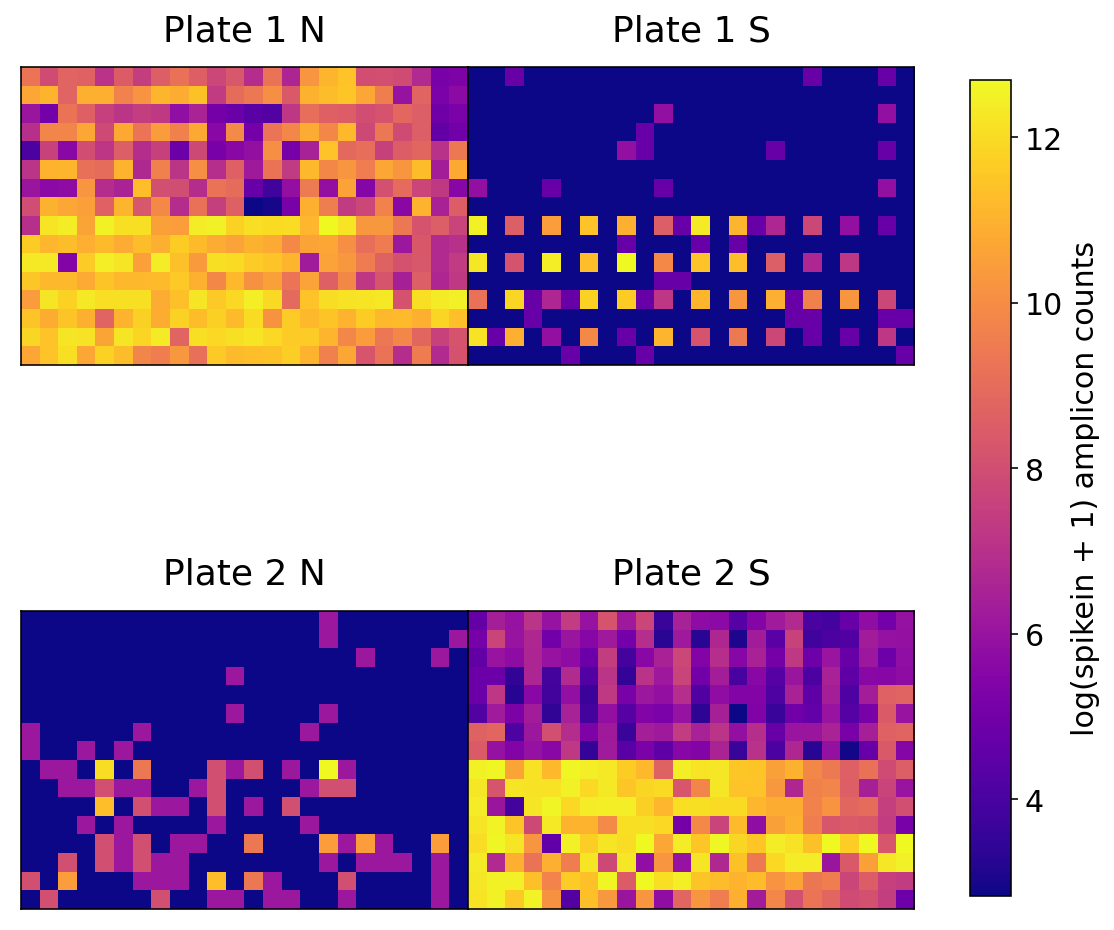

In [8]:
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
fig.subplots_adjust(wspace=0, hspace=0)

# Plate 1 N spike
ax = axs[0,0]
mtx = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].layers["raw"][:,adata.var.gene == "N1_spikein"]).reshape(16, 24)
plate_plot_empty(np.log1p(mtx), ax)
ax.set_title("Plate 1 N")

# Plate 1 S Spike
ax = axs[0,1]
mtx = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].layers["raw"][:,adata.var.gene == "S2_spikein"]).reshape(16, 24)
plate_plot_empty(np.log1p(mtx), ax)
ax.set_title("Plate 1 S")

# Plate 2 N Spike
ax = axs[1,0]
mtx = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].layers["raw"][:,adata.var.gene == "N1_spikein"]).reshape(16, 24)
plate_plot_empty(np.log1p(mtx), ax)
ax.set_title("Plate 2 N")

# Plate 2 S Spike
ax = axs[1,1]
mtx = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].layers["raw"][:,adata.var.gene == "S2_spikein"]).reshape(16, 24)
cax, ax = plate_plot_empty(np.log1p(mtx), ax)
ax.set_title("Plate 2 S")

#plt.tight_layout()
cbar = fig.colorbar(cax, ax=axs.ravel().tolist(), shrink=0.75, label="log(spikein + 1) amplicon counts")
#plt.savefig("./figs/crossover.png",bbox_inches='tight', dpi=300)

plt.show()

# Amount of viral RNA per well

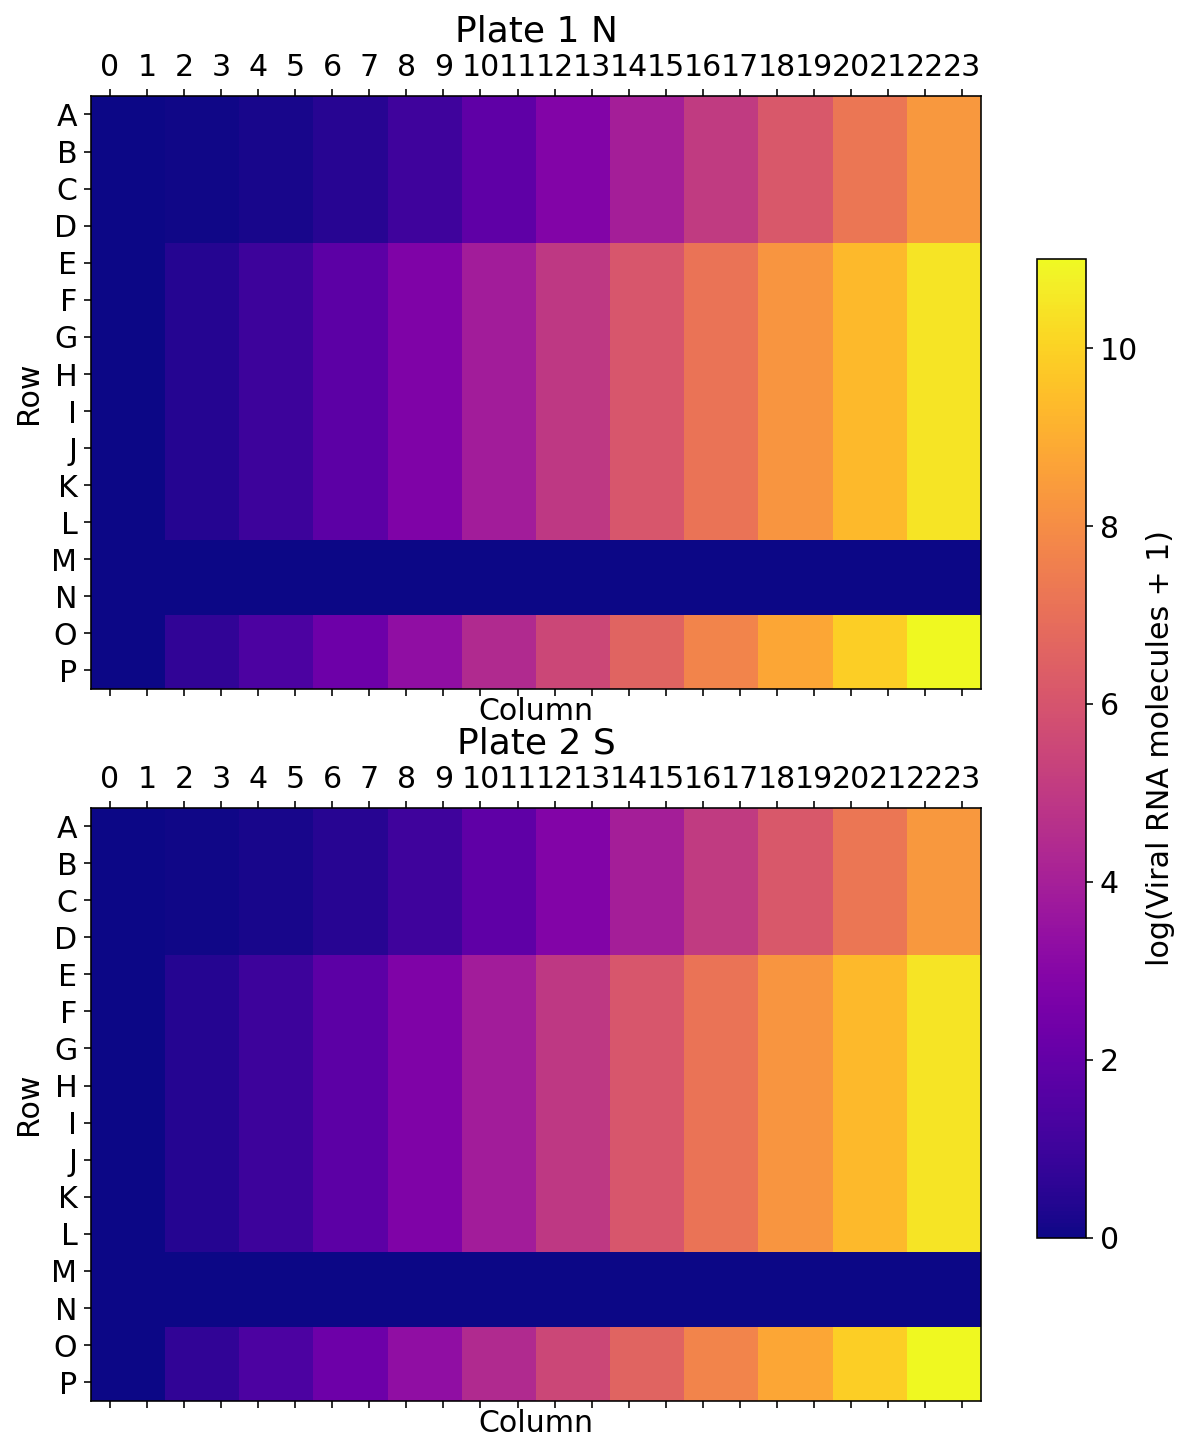

In [9]:
fig, axs = plt.subplots(figsize=(10,12), nrows=2)

# Plate 1
ax = axs[0]
mtx1 = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].obs["Twist"].values).reshape(16, 24)
mtx2 = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].obs["ATCC_RNA"].values).reshape(16, 24)
mtx3 = nd(adata[adata[adata.obs.plate=="Plate1"].obs.sort_values("well").index].obs["ATCC_viral"].values).reshape(16, 24)
mtx = mtx1+mtx2+mtx3
plate_plot(np.log1p(mtx), ax)
ax.set_title("Plate 1 N", pad=12.5)


# PLate 2
ax = axs[1]
mtx1 = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].obs["Twist"].values).reshape(16, 24)
mtx2 = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].obs["ATCC_RNA"].values).reshape(16, 24)
mtx3 = nd(adata[adata[adata.obs.plate=="Plate2"].obs.sort_values("well").index].obs["ATCC_viral"].values).reshape(16, 24)
mtx = mtx1+mtx2+mtx3
cax, ax = plate_plot(np.log1p(mtx), ax)
ax.set_title("Plate 2 S", pad=12.5)


cbar = fig.colorbar(cax, ax=axs.ravel().tolist(), shrink=0.75, label="log(Viral RNA molecules + 1)")

#plt.savefig("./figs/amount_RNA.png",bbox_inches='tight', dpi=300)

plt.show()